# Lab 7
###### Author: Lucy Roberts
###### Anything else

In [39]:
# Import packages
import numpy as np
import pandas as pd
import folium

### Question 1

In [11]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrievalyp

In [11]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2000-01-01', end='2020-12-31')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd,63680_Maximum,63680_Maximum_cd,63680_Minimum,63680_Minimum_cd,63680_Median,63680_Median_cd
datetime,,,,,,,,,,,,,,,
2000-01-01 00:00:00+00:00,5.0,A,14339000,4.0,A,4.5,A,1620.0,A,2.0,A,2.0,A,2.0,A
2000-01-02 00:00:00+00:00,5.0,A,14339000,4.5,A,4.5,A,1520.0,A,3.0,A,2.0,A,2.0,A
2000-01-03 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1490.0,A,2.0,A,2.0,A,2.0,A
2000-01-04 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1540.0,A,2.0,A,2.0,A,2.0,A
2000-01-05 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1800.0,A,4.0,A,2.0,A,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,6.1,A,14339000,5.4,A,5.7,A,2000.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28 00:00:00+00:00,5.7,A,14339000,4.6,A,5.1,A,1640.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29 00:00:00+00:00,5.1,A,14339000,3.8,A,4.6,A,1470.0,A,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

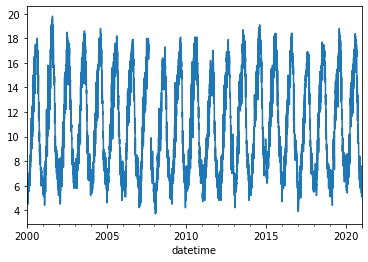

In [14]:
# Simple plot
df['00010_Maximum'].plot()

This is a *markdown cell* explaining my findings that I will write later when I am less sleepy.

### Question 2

In [32]:
#Rogue River
rogue = nwis.get_record('14339000', service='dv', start='2020-10-31', end='2021-09-30')
rogue['00060_Mean'].mean()

1670.7164179104477

In [33]:
#Crooked River
crooked = nwis.get_record('14087380', service='dv', start='2020-10-31', end='2021-09-30')
crooked['00060_Mean'].mean()

124.97582089552239

In [35]:
#Willamette River
willamette = nwis.get_record('14148000', service='dv', start='2020-10-31', end='2021-09-30')
willamette['00060_Mean'].mean()

2142.955223880597

<table>
  <tr>
    <th>River</th>
    <th>ID</th>
    <th>Avg Discharge (Cubic Feet)</th>
  </tr>
  <tr>
    <td>Rogue River</td>
    <td>'14339000'</td>
    <td>1670.7</td>
  </tr>
  <tr>
    <td>Crooked River</td>
    <td>'14087380'</td>
    <td>124.9</td>
  </tr>
    <tr>
    <td>Middle Fork Willamette</td>
    <td>'14148000'</td>
    <td>2143.0</td>
  </tr>
</table>

### Question 3 w/ extra credit

In [42]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [43]:
# Print number of tables on webpage
len(mountains)

13

In [44]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [45]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [46]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [47]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

In [54]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

In [55]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

In [83]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-3])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [98]:
# To get these data from every row, we can write another quick for loop
names = []
for mtn in range(len(mountain_stats)):
    i = 0
    while mountain_stats['Mountain peak'].iloc[mtn][i] != '[':
        i += 1
    names.append(mountain_stats['Mountain peak'].iloc[mtn][:i])
names

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [99]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=(isolation[i], names[i])).add_to(map)
map